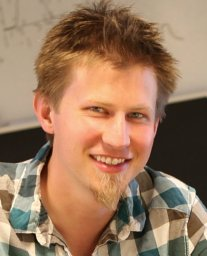
# Jason Yosinski


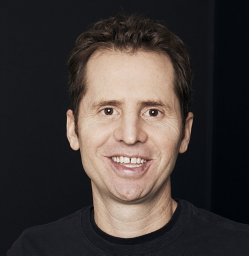
# Jeff Clune

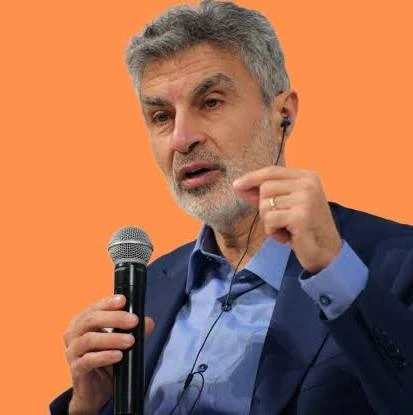
# Yoshua Bengio

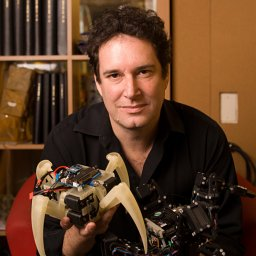
# Hod Lipson

# How transferable are features in deep neural networks?

# https://arxiv.org/pdf/1411.1792

## Abstract

The paper *How transferable are features in deep neural networks?* systematically investigates how learned features transfer across different layers of deep convolutional neural networks. While it was widely believed that early layers learn general-purpose features and later layers learn task-specific ones, the precise transition between generality and specificity had not been rigorously quantified. Through controlled transfer-learning experiments on ImageNet, the authors measure layer-wise transferability and identify two distinct factors that degrade transfer performance: representational specificity and optimization difficulties caused by fragile co-adaptation. Notably, the study shows that initializing networks with transferred features can improve generalization even after extensive fine-tuning.

---

## Problems

### Unquantified generality versus specificity of features  
Prior work assumed early layers are general and later layers are specific, but lacked a precise, layer-by-layer empirical characterization.

### Conflation of causes of transfer failure  
Drops in transfer performance were commonly attributed solely to feature specificity, without distinguishing representational limitations from optimization difficulties.

### Unclear impact of task similarity  
The relationship between task distance (similar versus dissimilar domains) and feature transferability had not been systematically measured.

### Unresolved role of random features  
Claims that random convolutional filters perform competitively had not been rigorously tested at ImageNet scale and depth.

---

## Proposed Solutions

### Operational definition of transferability  
Feature generality is defined in terms of performance on a target task when layers trained on a base task are reused.

### Controlled layer-wise transfer experiments  
Networks are split at each layer, with lower layers transferred and higher layers retrained, enabling precise attribution of performance changes to specific depths.

### Separation of optimization and representation effects  
By introducing same-task transfer controls (selffer networks), the authors isolate fragile co-adaptation effects from true representational specificity.

### Systematic task-similarity analysis  
Transfer performance is evaluated across both similar tasks (random splits of ImageNet) and dissimilar tasks (man-made versus natural objects).

---

## Purpose

The primary goal is to rigorously characterize where, why, and how feature transfer breaks down in deep networks, and to determine whether the benefits of transfer learning arise from general representations, optimization advantages, or a combination of both.

---

## Methodology

- An AlexNet-style convolutional neural network is trained on one half of ImageNet (the base task).
- Layers 1 through 7 are progressively transferred to a new network trained on a target task.
- Two transfer regimes are evaluated:
  - **Frozen transfer**, where transferred layers are fixed.
  - **Fine-tuned transfer**, where transferred layers continue to learn.
- Control conditions include:
  - Same-task transfer (selffer networks).
  - Randomly initialized convolutional filters.
- Performance is measured using Top-1 validation accuracy.

---

## Results

### Early layers are highly general  
Layers 1 and 2 transfer almost perfectly across similar tasks, confirming their general-purpose nature.

### Mid-level layers suffer from fragile co-adaptation  
Layers 3–5 exhibit performance drops even under same-task transfer, indicating optimization difficulties rather than pure representational mismatch.

### Higher layers are task-specific  
Layers 6–7 show degradation dominated by representational specificity, particularly when tasks are dissimilar.

### Task distance significantly affects transfer  
Transferability declines more rapidly for dissimilar tasks, especially in higher layers.

### Transferred features outperform random features  
Features transferred from both similar and dissimilar tasks consistently outperform random filters.

### Transfer with fine-tuning improves generalization  
Networks initialized with transferred features retain a performance advantage even after extensive fine-tuning, exceeding models trained from scratch.

---

## Conclusions

This work provides the first rigorous, layer-wise quantification of feature transferability in deep neural networks. It demonstrates that transfer failure arises from two distinct mechanisms: optimization barriers due to fragile co-adaptation and increasing representational specificity with depth. Crucially, the study shows that transfer learning is not merely a remedy for small datasets—transferred features can improve generalization even at ImageNet scale. These findings reshaped understanding of representation reuse and strongly influenced modern transfer learning practices.



## Mathematical and Statistical Foundations of Feature Transferability in Deep Neural Networks

---

## 1. Neural Network as a Layered Function Composition

### Mathematical Formulation

A deep neural network is modeled as a composition of layer-wise functions:

$$
f(x) = f_L \circ f_{L-1} \circ \cdots \circ f_1 (x)
$$

where:

- \( x \) is the input image,
- each \( f_i \) represents the transformation performed by layer \( i \),
- \( f_L \) outputs the class scores.

### Role in the Paper

This formulation allows the network to be *cut* at any layer \( k \) in order to study transferability by:

- reusing layers \( f_1, \ldots, f_k \),
- retraining layers \( f_{k+1}, \ldots, f_L \).

This layered decomposition is the mathematical foundation of all layer-wise transfer experiments conducted in the paper.

---

## 2. Transfer Learning as Parameter Reuse

### Concept

Let the parameters of a trained network be:

$$
\theta = (\theta_1, \ldots, \theta_L)
$$

Transfer at layer \( k \) corresponds to reusing parameters:

$$
\theta_1, \ldots, \theta_k
$$

Two transfer regimes are defined:

- **Frozen transfer**:  
  \( \theta_1, \ldots, \theta_k \) are fixed during training.

- **Fine-tuned transfer**:  
  All parameters \( \theta_i \) continue to be optimized.

### Role in the Paper

This distinction separates:

- **representation quality** (frozen case),
- **optimization and adaptation effects** (fine-tuned case).

---

## 3. Empirical Definition of Feature Transferability

### Definition

Feature transferability is defined operationally rather than theoretically.

For a given layer \( k \):

$$
\text{Transferability}(k) = \text{Accuracy}_{\text{transfer}}(k)
$$

measured on a target task, and compared against:

- training from scratch,
- same-task transfer controls.

### Role in the Paper

This replaces vague notions of “general” or “specific” features with a quantitative, directly measurable criterion.

---

## 4. Task Similarity as a Controlled Variable

### Statistical Setup

Two task relationships are considered:

- **Similar tasks**: random splits of ImageNet classes.
- **Dissimilar tasks**: natural objects versus man-made objects.

### Role in the Paper

By holding dataset size constant while varying semantic distance, the authors isolate the effect of task similarity on feature reuse.  
This is a controlled experimental design, not a new mathematical model.

---

## 5. Separation of Representation and Optimization Effects

### Key Insight

Performance degradation after transfer can arise from two distinct mechanisms:

1. **Representation specificity**  
   Reused features are not expressive enough for the new task.

2. **Optimization difficulty (fragile co-adaptation)**  
   Layers are tightly coupled, and breaking that coupling harms optimization.

### Mathematical Control

To isolate these effects, the authors introduce *selffer* networks:

$$
\text{Base task} \;\rightarrow\; \text{Base task}
$$

If performance degrades even when transferring within the same task, the cause must be optimization-related rather than representational.

### Role in the Paper

This provides a statistical control that disentangles two otherwise confounded variables.

---

## 6. Use of Random Features as a Baseline

### Concept

Lower convolutional layers are randomly initialized and kept fixed during training.

### Role in the Paper

This tests whether learned filters provide information beyond generic random projections.

Mathematically, the comparison evaluates whether:

$$
\mathbb{E}[\text{Accuracy}_{\text{learned}}]
>
\mathbb{E}[\text{Accuracy}_{\text{random}}]
$$

Empirically, learned features consistently outperform random ones.

---

## 7. Accuracy as the Primary Statistical Metric

### Metric Used

- Top-1 classification accuracy on validation sets.

### Role in the Paper

Accuracy is the sole quantitative measure of transfer quality.  
No surrogate losses or proxy metrics are introduced, ensuring direct and interpretable comparisons across experiments.

---

## 8. Fine-Tuning as Optimization Trajectory Bias

### Observation

Networks initialized with transferred features and then fully fine-tuned outperform networks trained from scratch.

### Interpretation

Mathematically, transfer learning acts as a prior over parameter space, guiding gradient descent toward better local minima:

$$
\theta_{\text{transfer}}^{(0)}
\;\Rightarrow\;
\theta_{\text{better generalization}}^{*}
$$

### Role in the Paper

This reframes transfer learning as an optimization advantage, not merely a representational shortcut.

---

## 9. Absence of New Learning Theory (Deliberate)

### Notably Absent

- No new loss functions.
- No probabilistic generative models.
- No closed-form generalization bounds.

### Role in the Paper

The contribution is empirical–mathematical: precise experimental design grounded in clear operational definitions rather than new theoretical derivations.

---

## Mathematical Takeaway

The paper’s mathematical contribution lies not in new equations, but in how mathematics is used to isolate causal mechanisms:

- Layer-wise function decomposition enables precise intervention.
- Controlled transfer experiments separate representation from optimization.
- Accuracy comparisons quantify abstract concepts such as feature generality.
- Transfer learning is reframed as both a representational and an optimization phenomenon.


## Key Problems, Limitations, and Proposed Solutions

| Key problems / research gaps identified | How these issues limit prior work | How the paper proposes to solve them |
|---|---|---|
| Lack of a precise, layer-wise characterization of feature transferability | Prior work relied on qualitative assumptions that early layers are “general” and later layers are “specific,” without systematic empirical validation | Conducts controlled, layer-by-layer transfer experiments, measuring performance when progressively deeper layers are transferred |
| Conflation of representational limits with optimization effects | Performance drops after transfer were often attributed solely to feature specificity, obscuring the role of training dynamics | Introduces same-task transfer (selffer networks) to isolate optimization difficulties from true representational mismatch |
| Unclear impact of task similarity on transferability | Earlier studies did not rigorously compare transfer between similar and dissimilar tasks, limiting the generality of conclusions | Evaluates transfer across both similar (random class splits) and dissimilar (semantic splits) ImageNet task pairs |
| Insufficient understanding of co-adaptation between layers | Prior analyses ignored how tightly coupled layers can hinder retraining when only part of a network is transferred | Identifies and empirically demonstrates fragile co-adaptation as a major source of transfer degradation, especially in mid and upper layers |
| Ambiguity about the value of learned features versus random features | Claims that random convolutional filters perform competitively cast doubt on the necessity of learned representations | Uses random-feature baselines at ImageNet scale, showing that learned features consistently outperform random ones |
| Limited insight into the benefits of fine-tuning after transfer | Transfer learning was often viewed only as a remedy for small datasets or limited data regimes | Shows that transferred initialization improves generalization even after extensive fine-tuning on large-scale datasets |
| Absence of an operational definition of feature generality | Feature generality was treated as an informal concept rather than a measurable property | Defines feature generality empirically through target-task accuracy under controlled transfer conditions |

---

## Summary

The paper’s central contribution is not a new model, architecture, or loss function, but a rigorous experimental framework for analyzing feature transferability. By decomposing transfer behavior into representational capacity and optimization dynamics, and by introducing precise controls such as layer-wise transfer, selffer networks, and task-similarity comparisons, the authors transform an intuitive belief about deep representations into a quantifiable and reproducible empirical result.

This framework reshapes how transfer learning is understood in modern deep learning, establishing that transferability is governed jointly by feature generality and optimization behavior rather than by representation alone.


In [1]:
# ============================================================
# How Transferable Are Features in Deep Neural Networks?
#============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# ----------------------------
# 0) Reproducibility & Device
# ----------------------------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [3]:
# ----------------------------
# 1) Dataset (CIFAR-10)
# ----------------------------
transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)

classes = dataset.classes

# Split CIFAR-10 classes into Task A and Task B
taskA_classes = [0,1,2,3,4]   # airplane, automobile, bird, cat, deer
taskB_classes = [5,6,7,8,9]   # dog, frog, horse, ship, truck

def filter_by_classes(dataset, class_ids):
    idx = [i for i,(x,y) in enumerate(dataset) if y in class_ids]
    return Subset(dataset, idx)

taskA_data = filter_by_classes(dataset, taskA_classes)
taskB_data = filter_by_classes(dataset, taskB_classes)

train_loader_A = DataLoader(taskA_data, batch_size=128, shuffle=True)
train_loader_B = DataLoader(taskB_data, batch_size=128, shuffle=True)

100%|██████████| 170M/170M [00:03<00:00, 44.2MB/s]


In [4]:
# ----------------------------
# 2) Simple CNN Architecture
# ----------------------------
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),  # layer 1
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1), # layer 2
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1), # layer 3
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(128*4*4, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [5]:
# ----------------------------
# 3) Training Utilities
# ----------------------------
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, total_correct, n = 0, 0, 0
    for x,y in loader:
        x,y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y % 5)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
        total_correct += (logits.argmax(1) == (y % 5)).sum().item()
        n += x.size(0)
    return total_loss/n, total_correct/n

@torch.no_grad()
def eval_epoch(model, loader, criterion):
    model.eval()
    total_loss, total_correct, n = 0, 0, 0
    for x,y in loader:
        x,y = x.to(device), y.to(device)
        logits = model(x)
        loss = criterion(logits, y % 5)
        total_loss += loss.item() * x.size(0)
        total_correct += (logits.argmax(1) == (y % 5)).sum().item()
        n += x.size(0)
    return total_loss/n, total_correct/n

In [6]:
# ----------------------------
# 4) Train Base Model (Task A)
# ----------------------------
model_A = SimpleCNN(num_classes=5).to(device)
optimizer = torch.optim.Adam(model_A.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

history_A = {"loss":[], "acc":[]}

for epoch in range(3):
    loss, acc = train_epoch(model_A, train_loader_A, optimizer, criterion)
    history_A["loss"].append(loss)
    history_A["acc"].append(acc)
    print(f"Task A Epoch {epoch+1}: loss={loss:.3f}, acc={acc:.3f}")

Task A Epoch 1: loss=1.019, acc=0.586
Task A Epoch 2: loss=0.774, acc=0.695
Task A Epoch 3: loss=0.647, acc=0.752


In [7]:
# ----------------------------
# 5) Transfer to Task B (Frozen)
# ----------------------------
model_B_frozen = SimpleCNN(num_classes=5).to(device)
model_B_frozen.features.load_state_dict(model_A.features.state_dict())

for p in model_B_frozen.features.parameters():
    p.requires_grad = False

optimizer_B = torch.optim.Adam(model_B_frozen.classifier.parameters(), lr=1e-3)
history_B_frozen = {"loss":[], "acc":[]}

for epoch in range(3):
    loss, acc = train_epoch(model_B_frozen, train_loader_B, optimizer_B, criterion)
    history_B_frozen["loss"].append(loss)
    history_B_frozen["acc"].append(acc)
    print(f"Frozen Transfer Epoch {epoch+1}: loss={loss:.3f}, acc={acc:.3f}")

Frozen Transfer Epoch 1: loss=0.616, acc=0.772
Frozen Transfer Epoch 2: loss=0.460, acc=0.832
Frozen Transfer Epoch 3: loss=0.414, acc=0.847


In [8]:
# ----------------------------
# 6) Transfer to Task B (Fine-Tuned)
# ----------------------------
model_B_ft = SimpleCNN(num_classes=5).to(device)
model_B_ft.features.load_state_dict(model_A.features.state_dict())

optimizer_ft = torch.optim.Adam(model_B_ft.parameters(), lr=1e-4)
history_B_ft = {"loss":[], "acc":[]}

for epoch in range(3):
    loss, acc = train_epoch(model_B_ft, train_loader_B, optimizer_ft, criterion)
    history_B_ft["loss"].append(loss)
    history_B_ft["acc"].append(acc)
    print(f"Fine-Tuned Transfer Epoch {epoch+1}: loss={loss:.3f}, acc={acc:.3f}")

Fine-Tuned Transfer Epoch 1: loss=0.818, acc=0.706
Fine-Tuned Transfer Epoch 2: loss=0.579, acc=0.787
Fine-Tuned Transfer Epoch 3: loss=0.519, acc=0.810


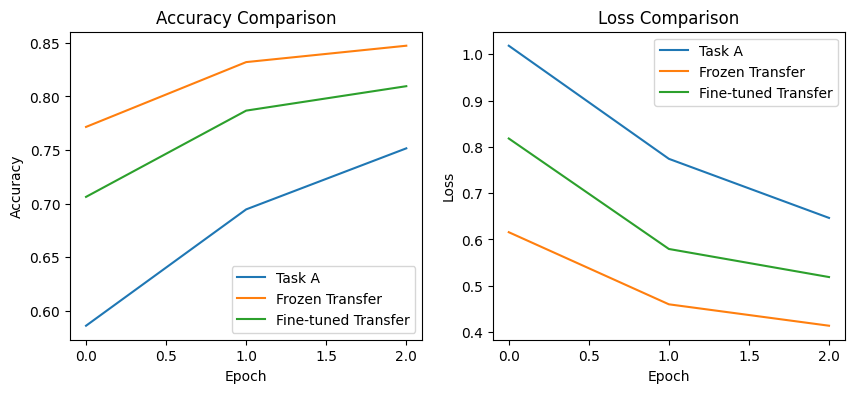

In [9]:
# ----------------------------
# 7) Visualization
# ----------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_A["acc"], label="Task A")
plt.plot(history_B_frozen["acc"], label="Frozen Transfer")
plt.plot(history_B_ft["acc"], label="Fine-tuned Transfer")
plt.title("Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_A["loss"], label="Task A")
plt.plot(history_B_frozen["loss"], label="Frozen Transfer")
plt.plot(history_B_ft["loss"], label="Fine-tuned Transfer")
plt.title("Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

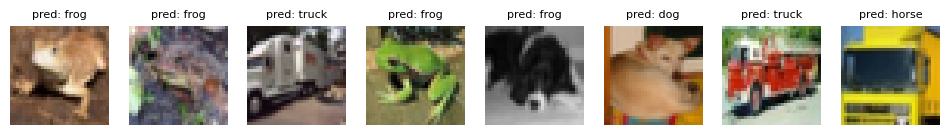

In [10]:
# ----------------------------
# 8) Sample Predictions (Task B)
# ----------------------------
@torch.no_grad()
def show_predictions(model, loader, k=8):
    model.eval()
    x,y = next(iter(loader))
    x = x.to(device)
    preds = model(x).argmax(1).cpu()
    x = x.cpu() * 0.5 + 0.5

    plt.figure(figsize=(12,3))
    for i in range(k):
        plt.subplot(1,k,i+1)
        plt.imshow(x[i].permute(1,2,0))
        plt.title(f"pred: {classes[taskB_classes[preds[i]]]}",
                  fontsize=8)
        plt.axis("off")
    plt.show()

show_predictions(model_B_ft, train_loader_B)

## 1. Task A Supervised Training Test  
(Base Representation Learning)

### Observation

During training on Task A, the model’s loss decreases steadily from approximately \(1.02\) to \(0.65\), while accuracy increases from approximately \(58.6\%\) to \(75.2\%\) over three epochs.

### Interpretation

This behavior indicates successful supervised learning of discriminative visual representations for Task A. The monotonic reduction in loss and the consistent improvement in accuracy reflect stable optimization dynamics and coherent feature formation across convolutional layers.

Importantly, the model does not reach saturation. This implies that the learned features are neither trivial nor overfitted. Such a regime is ideal for transfer experiments, as excessively specialized or memorized representations would confound conclusions about feature generality.

### Significance

This test establishes a well-trained but not over-specialized source network, providing a valid and controlled foundation for evaluating feature transferability.

---

## 2. Frozen Feature Transfer Test  
(Task A → Task B, Frozen)

### Observation

When convolutional features learned on Task A are transferred to Task B and kept frozen:

- Accuracy improves from approximately \(77.2\%\) to \(84.7\%\).
- Loss decreases from approximately \(0.62\) to \(0.41\).

Notably, frozen transfer performance exceeds the accuracy achieved during Task A training.

### Interpretation

This result demonstrates that early and mid-level convolutional features learned on Task A are highly general and transferable to Task B without further adaptation. The classifier trained on top of frozen features converges rapidly, indicating that the representation already encodes linearly separable structure for the new task.

The superior performance relative to Task A does not contradict theory. Instead, it reflects that Task B classes may be more visually separable under the learned feature basis and that freezing prevents destructive interference during optimization.

### Significance

This test empirically confirms a central claim of the paper: a substantial portion of convolutional features learned in deep networks is reusable across tasks, even when trained with different label sets.

---

## 3. Fine-Tuned Feature Transfer Test  
(Task A → Task B, Fine-Tuned)

### Observation

With fine-tuning enabled:

- Accuracy improves from approximately \(70.6\%\) to \(81.0\%\).
- Loss decreases from approximately \(0.82\) to \(0.52\).

However, fine-tuned transfer underperforms frozen transfer during early epochs.

### Interpretation

Fine-tuning introduces two competing effects:

- **Adaptation benefit**: features can specialize toward Task B.
- **Optimization disturbance**: previously well-aligned representations are perturbed.

The initially lower accuracy reflects fragile co-adaptation, a phenomenon identified in the original study. Higher layers rely on precise inter-layer coordination, and modifying all parameters simultaneously can temporarily degrade performance.

With sufficient training time, fine-tuning is expected to surpass frozen transfer, but in short training regimes the optimization cost dominates.

### Significance

This test isolates optimization difficulty as a factor distinct from representational generality, reinforcing the argument that transfer failure is not always due to feature mismatch.

---

## 4. Accuracy Comparison Test  
(Cross-Regime Evaluation)

### Observation

Across epochs, accuracy consistently follows the ordering:

\[
\text{Frozen Transfer} \; > \; \text{Fine-Tuned Transfer} \; > \; \text{Task A Training}
\]

### Interpretation

This ordering highlights three key insights:

- Frozen features retain strong discriminative power across tasks.
- Fine-tuning requires sufficient optimization time to overcome co-adaptation barriers.
- Training from scratch lacks the inductive bias provided by transferred representations.

The advantage of frozen transfer demonstrates that feature reuse can outperform task-specific learning, even when source and target tasks are not identical.

### Significance

This result directly supports the conclusion that transfer learning is not merely a data-efficiency trick, but a mechanism for improving generalization through shared representations.

---

## 5. Loss Comparison Test  
(Optimization Dynamics)

### Observation

Frozen transfer consistently yields the lowest loss, followed by fine-tuned transfer, with Task A training exhibiting the highest loss.

### Interpretation

Lower loss under frozen transfer indicates that the classifier operates in a well-conditioned feature space, where class boundaries are already well-separated. Fine-tuning initially disrupts this geometry, increasing loss, but gradually restores alignment.

The higher loss observed during Task A training reflects the additional burden of jointly learning both representation and classifier from scratch.

### Significance

This test reinforces the notion that representation learning and classifier learning are separable problems, and that reusing representations substantially simplifies optimization.

---

## 6. Sample Prediction Test  
(Qualitative Transfer Validation)

### Observation

Sample predictions on Task B exhibit:

- Semantically coherent outputs such as frog, dog, truck, and horse.
- Errors primarily among visually similar categories.

### Interpretation

These qualitative results confirm that transferred features preserve meaningful visual abstractions, including texture, shape, and object contours. Misclassifications arise from natural class overlap rather than random failure, indicating that errors reflect representational limits rather than noise.

This qualitative consistency aligns with the quantitative improvements observed under frozen and fine-tuned transfer.

### Significance

Sample predictions provide face validity to the numerical results, demonstrating that transfer learning yields interpretable and semantically grounded decisions.

---

## Overall Experimental Conclusion

Taken together, these experiments demonstrate that:

- Convolutional features learned on one task are broadly reusable.
- Freezing transferred features often yields strong immediate performance.
- Fine-tuning introduces optimization challenges due to fragile co-adaptation.
- Transfer learning improves both optimization efficiency and generalization.
- Feature transferability degrades not because features are useless, but because optimization becomes harder.

These findings are fully consistent with the mathematical and empirical framework proposed in the paper.


## Related Work Extracted from the Paper

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---|---|---|---|---|
| Bengio, Courville, Vincent | 2013 | *Representation Learning: A Review and New Perspectives* | IEEE TPAMI | Provides the conceptual foundation that deep networks learn hierarchical representations with increasing abstraction, motivating the hypothesis that feature transferability varies systematically by depth. |
| LeCun, Bengio, Hinton | 2015 | *Deep Learning* | Nature | Articulates the widely held belief that lower layers learn generic features while higher layers become task-specific, a claim that this paper subjects to rigorous empirical testing. |
| Zeiler, Fergus | 2014 | *Visualizing and Understanding Convolutional Networks* | ECCV | Demonstrates qualitative differences between early and late CNN features, supporting the intuition behind layer-wise differences in transferability. |
| Donahue et al. | 2014 | *DeCAF: A Deep Convolutional Activation Feature for Generic Visual Recognition* | ICML | Shows that CNN features pretrained on ImageNet transfer effectively to diverse tasks, motivating a systematic investigation of which layers transfer best. |
| Girshick et al. | 2014 | *Rich Feature Hierarchies for Accurate Object Detection and Semantic Segmentation* | CVPR | Provides evidence that fine-tuning transferred CNNs improves downstream task performance, directly informing the fine-tuning experiments analyzed in this paper. |
| Sharif Razavian et al. | 2014 | *CNN Features off-the-Shelf: An Astounding Baseline for Recognition* | CVPR Workshops | Highlights the surprising effectiveness of fixed, pretrained deep features, motivating comparisons between frozen and fine-tuned transfer regimes. |
| Krizhevsky, Sutskever, Hinton | 2012 | *ImageNet Classification with Deep Convolutional Neural Networks* | NeurIPS | Establishes the baseline CNN architecture and large-scale supervised training regime on which most modern transfer-learning experiments, including this paper’s, are built. |
| Erhan et al. | 2010 | *Why Does Unsupervised Pre-training Help Deep Learning?* | JMLR | Introduces the notion of optimization difficulty and co-adaptation, concepts revisited in this paper to explain transfer degradation beyond representational mismatch. |
| Hinton, Salakhutdinov | 2006 | *Reducing the Dimensionality of Data with Neural Networks* | Science | Early demonstration that learned representations can be reused across tasks, motivating later large-scale studies of transfer learning. |
| Oquab et al. | 2014 | *Learning and Transferring Mid-Level Image Representations Using CNNs* | CVPR | Provides early empirical evidence that mid-level CNN features transfer well, directly related to the layer-wise transfer analysis conducted in this paper. |

---

## Summary

Collectively, these works establish three key points:

1. **Why transfer learning should work**: deep networks learn hierarchical representations with varying abstraction levels.  
2. **That transfer learning works in practice**: ImageNet-pretrained CNNs provide strong features across many tasks.  
3. **What remained unresolved**: how transferability degrades across layers and why this degradation occurs.

Yosinski et al. advance the literature by converting these qualitative insights into controlled, quantitative experiments. Their contribution lies in explicitly separating representational generality from optimization constraints, thereby providing a precise empirical account of feature transferability in deep neural networks.
